## Locating a Collection

### Background

Eleven extant Greek texts (and one lost one) are usually said to have comprised the Little Astronomy. These texts are the following:

* Theodosius's (1st c. BCE)
   * *Sphaerica*
   * *On Habitations*
   * *On Nights and Days*
* Autolycus’s (4th c. BCE)
   * *On the Moving Sphere*
   * *On Risings and Settings*
* Euclid’s (3rd c. BCE) 
   * *Phaenomena*
   * *Data*
   * *Optics*
   * *Catoptrica*
* Aristarchus’s (3rd c. BCE)
   * *On the Sizes and Distances of the Sun and the Moon*
* Hypsicles’s (2nd c. BCE)
   * *Anaphoricus*
* Menelaus’s (1st c. CE)
   * *Spherics* (no longer extant in Greek)
   
And any number of commentaries on the above texts are sometimes added to the list.

However, the sources for the above, full list are quite late, considering the collection is usually supposed to have existed by the 4th century CE when Pappus of Alexandria was writing his *Collection*. Earlier sources mention fewer works. The introduction of book 6 of the *Collection*, where a scholion appears mentioning a 'little astronomy', specifically cites Euclid’s *Phaenomena* and Theodosius’s *Sphaerica* and *On Nights and Days*. Book 6 in its entirety cites:

* *Sphaerica*
* *On the Moving Sphere*
* *On Nights and Days*
* *On Sizes and Distances*
* *Optics*
* *Phaenomena*
* *Spherics* (Menelaus)

That same book, however, also references other works such as the *Almagest* and a work by Hipparchus, so it is not a certainty that works referenced in this text definitely belonged to the Little Astronomy.

Philoponus, meanwhile, might also have been drawing on the Little Astronomy -- the works he mentions by name are Theodosius’s *Sphaerica*, Autolycus’s *On the Moving Sphere* and Euclid’s *Phaenomena*.

Otherwise, the sources explicitly linking certain texts with a collection called the Little Astronomy are later scholars starting with Vossius in the 17th century. Vossius includes only nine of the twelve texts above: Menelaus's *Spherics* does not make the list, and nor do Euclid's *Data* or *Catoptrica*. It is Fabricius in the 18th century whose list includes all twelve.

### The Problem

How, then, are we to locate a collection in the manuscripts when we are uncertain as to its exact members? And furthermore, how can we determine when we have an intentional collection of texts in a particular manuscript rather than an accidental grouping of any number of the above eleven works?

Certainly manuscripts which contain only one text from the Little Astronomy are not presenting a collection, and we can easily say the same for those manuscripts containing two. When we have a manuscript containing five of the Little Astronomy texts, however, can we determine whether this is an incomplete Little Astronomy or whether the grouping occured due to other factors? Two alternative reasons for these texts to be grouped together immediately suggest themselves: 1) several works share an author and 2) all works deal with a mathematical and astronomical subject. Each of the eleven are of a similar type as well: prose works presenting information in a proposition-based structure accompanied by mathematical diagrams. There are reasons for these texts to appear in the same manuscripts together regardless of whether there existed an ancient collection called the Little Astronomy. Can we disentangle this?



### Preliminary Matters

In [252]:
import gzip            # can uncompress gzipped files, useful for accessing the pleiades data
import io              # useful routines for input/output
import numpy as np
import pandas as pd    # for working with "rows/columns" oriented data
import pymysql.cursors # 
import sqlite3         # an SQL database
import urllib.request  # for loading documents using http
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from matplotlib.ticker import MaxNLocator

# Connect to the database
connection = pymysql.connect(host='hosting.nyu.edu',
                             user='cmrougha_adsq',
                             password='###REPLACE###',
                             db='cmrougha_adsq2017',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

In [253]:
sql = """
SELECT *
 FROM `ms-to-texts`
"""

with connection.cursor() as cursor:

    cursor.execute(sql)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df = pd.DataFrame(result, columns = names)
df.head(5)

,shelfmark_id,number_all,number_LA,text_S,text_MS,text_O,text_P,text_H,text_NaD,text_SaD,text_RaS,text_A,text_C,text_D,corrected
0,Vat.gr.190,4,1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,
1,Vat.gr.204,13,11,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,
2,Laur.Plut.28.3,3,2,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,
3,"BC dell Arch.A18,19",2,1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,!
4,ÖNB.phil.gr.31,3,2,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,


### Examining the Correlation between Texts

One approach to looking for a collection in these manuscripts is uncomplicated: we contrast what is found in manuscripts with six or more Little Astronomy works (the 6+ Subgroup) and in manuscripts with five or less Little Astronomy works (the 5- Subgroup). The former contains only 17 manuscripts, and the latter contains 130.

From the table `ms-to-texts` we can draw out information regarding which texts appear together both within and outside suspected Little Astronomy codices (the 6+ Subgroup). The above output five rows demonstrate the layout of that particular table. Below we will run code that seeks when pairs of columns both read 'TRUE', gathers that and other relevant data into a dictionary, and inputs data from that dictionary into graph visualizations.

In [255]:
texts = ['text_S','text_H','text_NaD','text_MS','text_RaS','text_P','text_D','text_C','text_O','text_SaD','text_A']
num_Plus = 6       # For dividing the data in two sets, >= # and < #
                   # This is left as a variable for easy adjustment
correlations1 = dict()
correlations2 = dict()

for text1 in texts:
    correlations1[text1] = list()
    correlations2[text1] = list()
    for text2 in texts:
        if text1 != text2:
            correlation1_Count = df[['shelfmark_id',text1,text2]][(df[text1] == 'TRUE') & (df[text2] == 'TRUE') & (df['number_LA'] >= num_Plus)].count()[0]
            correlations1[text1].append((text2,int(correlation1_Count)))
            
            correlation2_Count = df[['shelfmark_id',text1,text2]][(df[text1] == 'TRUE') & (df[text2] == 'TRUE') & (df['number_LA'] < num_Plus)].count()[0]
            correlations2[text1].append((text2,int(correlation2_Count)))
            
            #print(text1 + ' & ' + text2 + ": " + str(correlation_Count))

#print(correlations)



In [256]:
sql2 = """
SELECT *
 FROM `texts`
"""

with connection.cursor() as cursor:

    cursor.execute(sql2)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df2 = pd.DataFrame(result, columns = names)

In [257]:
to_fullName = dict()

for text in texts:
    fullName = df2.loc[df2['text_id'] == text, 'text_name-short'].to_string()
    fullName = fullName.split('   ')[1].strip()
    to_fullName[text] = fullName
    
print(to_fullName)

{'text_D': 'Data', 'text_A': 'Anaphoricus', 'text_MS': 'Moving Sphere', 'text_H': 'Habitations', 'text_P': 'Phaenomena', 'text_C': 'Catoptrica', 'text_NaD': 'Nights and Days', 'text_S': 'Sphaerica', 'text_SaD': 'Sizes and Distances', 'text_O': 'Optica', 'text_RaS': 'Risings and Settings'}


### The First Visualizations

These first visualizations are graphs demonstrating how often the texts of the Little Astronomy appear with each other in the same manuscript. Focus is on the context of manuscripts containing at least six Little Astronomy texts -- i.e., suspected Little Astronomy manuscripts for this initial, uncomplicated approach.

It is important to note that because we are looking at correlations between two texts, we are omitting from this analysis the 62 manuscripts in our database that contain only one text from the Little Astronomy.

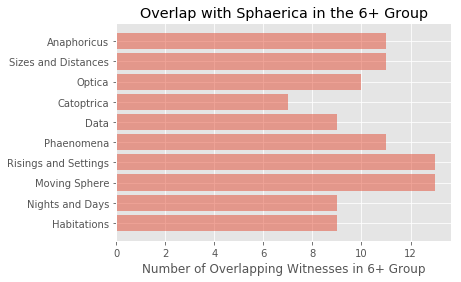

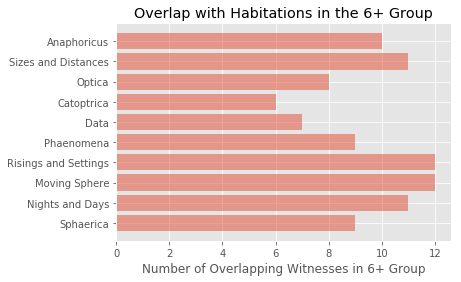

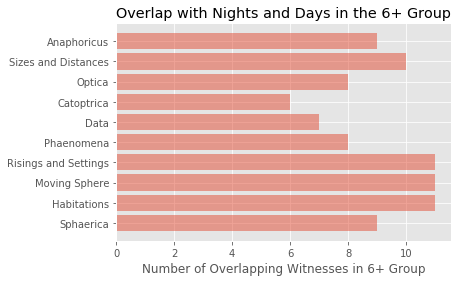

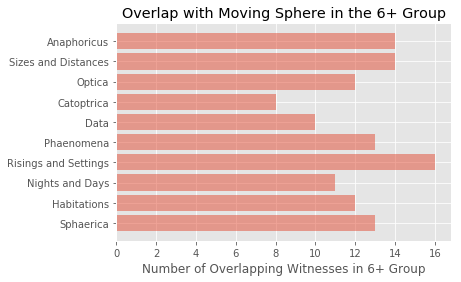

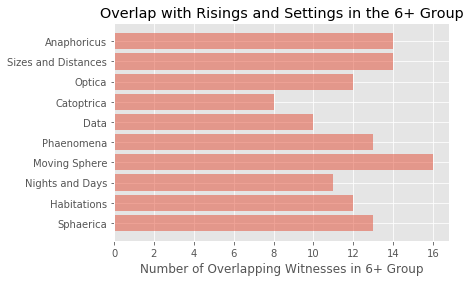

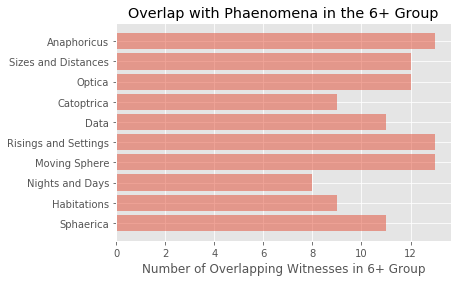

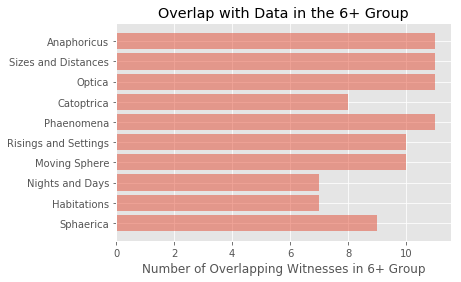

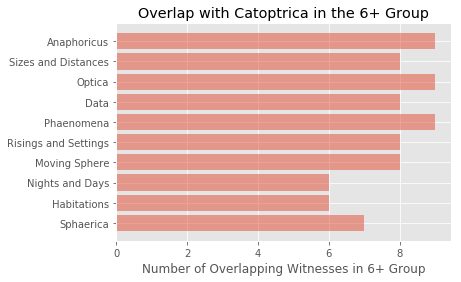

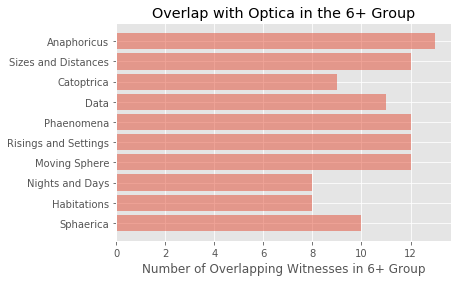

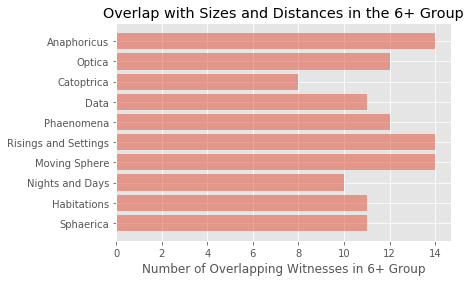

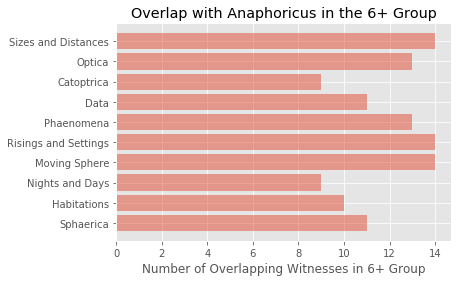

In [258]:
for text in texts:
    titles = []
    numWitnesses = []
    for corr in correlations1[text]:
        titles.append(to_fullName[corr[0]])
        numWitnesses.append(corr[1])


    y_pos = np.arange(len(titles))
 
    plt.barh(y_pos, numWitnesses, align='center', alpha=0.5)
    plt.yticks(y_pos, titles)
    plt.xlabel('Number of Overlapping Witnesses in 6+ Group')
    plt.title('Overlap with ' + to_fullName[text] + ' in the 6+ Group')
 
    plt.show()


### Incorporating More Data into our Visualizations

The above depicts data only for the suspected Little Astronomy manuscripts (the 6+ Group), but we actually have two groups presently which are worth comparing: the 6+ Group and the 5- Group. Below is code to produce a stacked bar graph presenting both datasets.

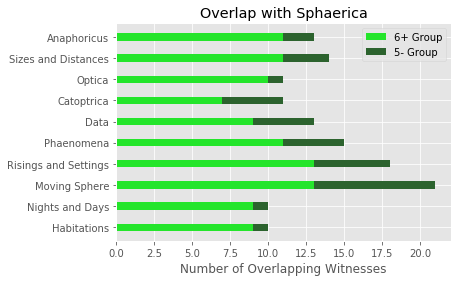

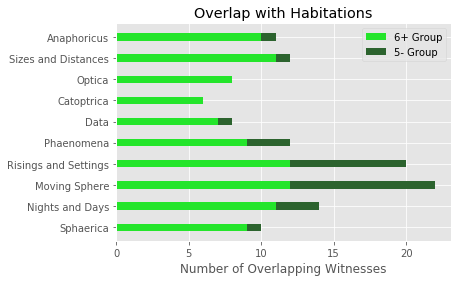

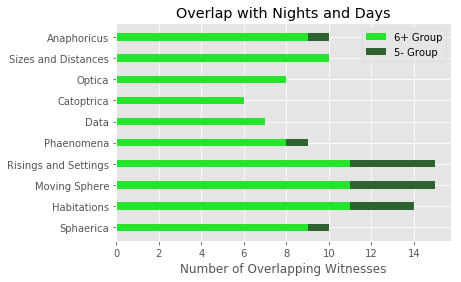

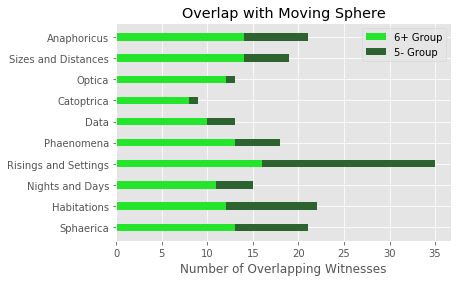

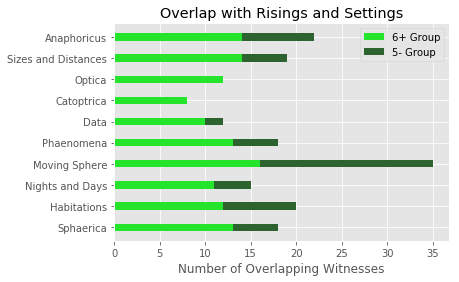

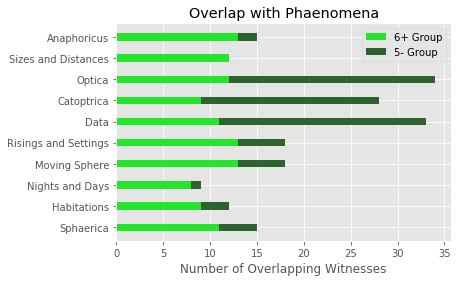

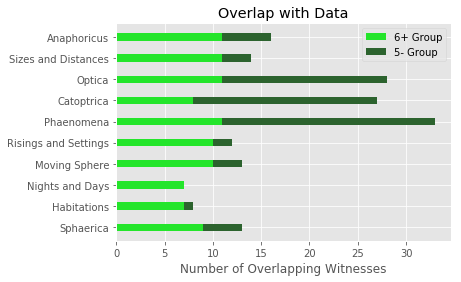

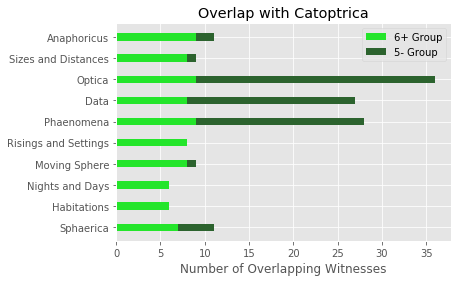

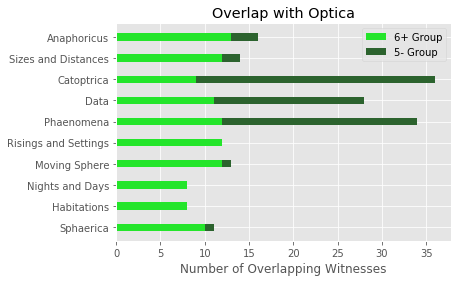

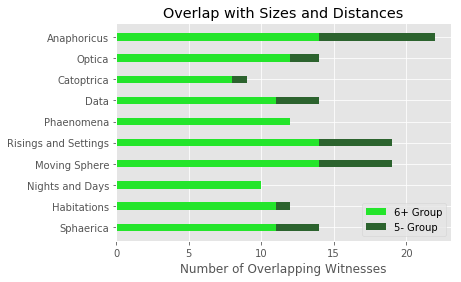

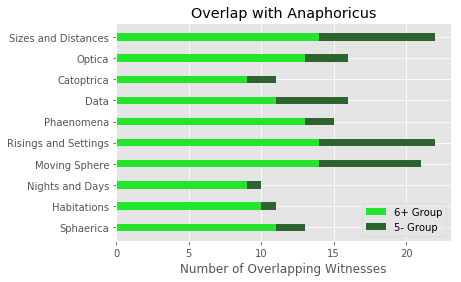

In [259]:
for text in texts:
    titles = []
    group1 = []
    group2 = []

    for corr in correlations1[text]:
        titles.append(to_fullName[corr[0]])
        group1.append(corr[1])

    for corr in correlations2[text]:
        group2.append(corr[1])

    x_pos = np.arange(len(titles))
    width = 0.35

    p1 = plt.barh(y_pos, group1, width, color='#24e52b')
    p2 = plt.barh(y_pos, group2, width, color='#2c632e', left=group1)

    plt.yticks(x_pos, titles)
    plt.xlabel('Number of Overlapping Witnesses')
    plt.title('Overlap with ' + to_fullName[text])

    plt.legend((p1[0], p2[0]), ('6+ Group', '5- Group'))

    plt.show()

### Something More Complicated

All of the above was performed under the assumption that it could be interesting to look at correlations between texts in two different contexts: the 6+ Group and the 5- Group. And certainly we can make various useful observations, such as that there are several texts which the *Catoptrica* appears with only in the context of the 6+ Group, or that the Euclidean texts (the *Phaenomena*, *Optica*, *Catoptrica*, and *Data*) appear together more often in manuscripts with few Little Astronomy texts than otherwise.

Perhaps we could glean something interesting from looking at all the possible contexts for LA text count? When two texts appear together, this can happen in anything from manuscripts containing only two LA texts to those containing all eleven. We now set about extracting data from our table to look at all ten of these contexts separately in our visualization.

In [260]:
correlations11 = dict()

for text1 in texts:
    correlations11[text1] = dict()
    for i in range(2, 12):
        correlations11[text1][i] = list()
        for text2 in texts:
            if text1 != text2: 
                correlation11_Count = df[['shelfmark_id',text1,text2]][(df[text1] == 'TRUE') & (df[text2] == 'TRUE') & (df['number_LA'] == i)].count()[0]
                correlations11[text1][i].append((text2,int(correlation11_Count)))


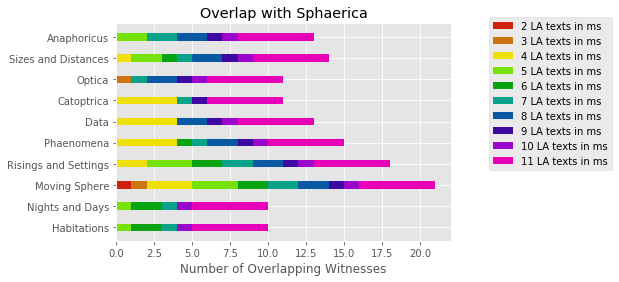

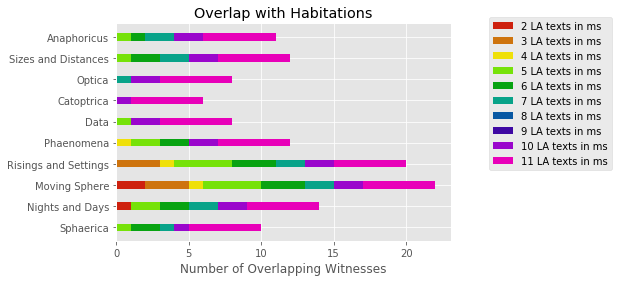

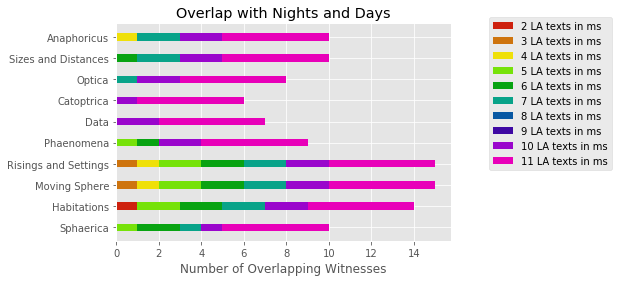

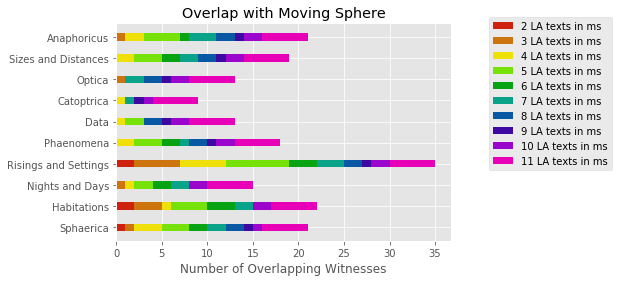

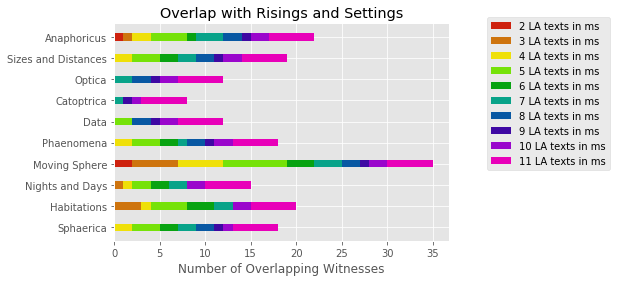

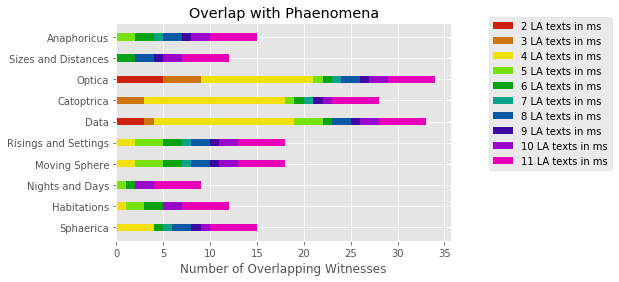

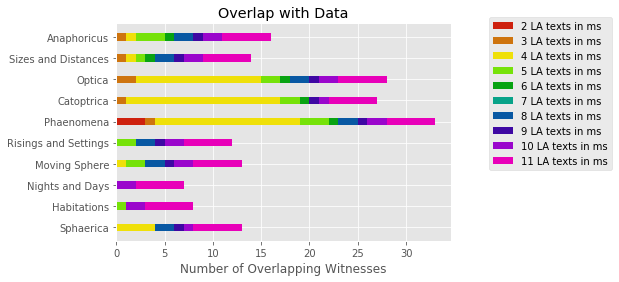

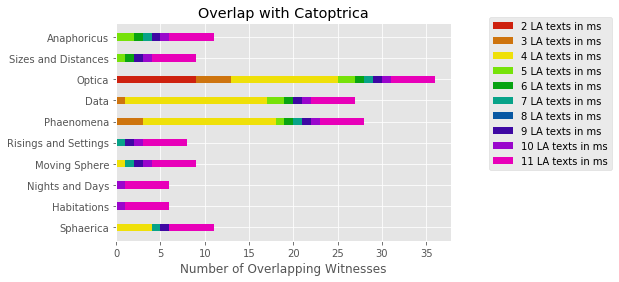

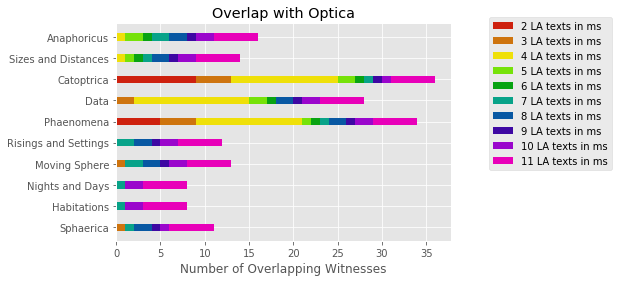

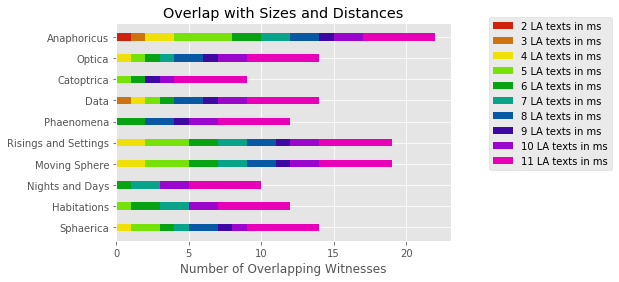

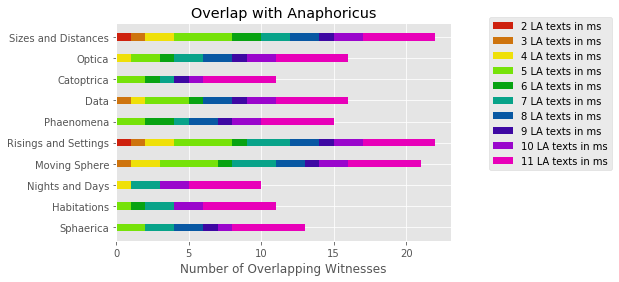

In [261]:
# I am sure there is a more elegant way to write this code. This works,
# however, so I am leaving it as is for the time being.

for text in texts:
    titles = []
    wit2 = []
    wit3 = []
    wit4 = []
    wit5 = []
    wit6 = []
    wit7 = []
    wit8 = []
    wit9 = []
    wit10 = []
    wit11 = []

    for corr in correlations11[text][2]:
        titles.append(to_fullName[corr[0]])
        wit2.append(corr[1])

    for corr in correlations11[text][3]:        
        wit3.append(corr[1])
    for corr in correlations11[text][4]: 
        wit4.append(corr[1])
    for corr in correlations11[text][5]: 
        wit5.append(corr[1])
    for corr in correlations11[text][6]: 
        wit6.append(corr[1])
    for corr in correlations11[text][7]: 
        wit7.append(corr[1])
    for corr in correlations11[text][8]: 
        wit8.append(corr[1])
    for corr in correlations11[text][9]: 
        wit9.append(corr[1])
    for corr in correlations11[text][10]: 
        wit10.append(corr[1])
    for corr in correlations11[text][11]: 
        wit11.append(corr[1])

    x_pos = np.arange(len(titles))    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p2 = plt.barh(y_pos, wit2, width, color='#ce210e')
    p3 = plt.barh(y_pos, wit3, width, color='#ce740e', left=wit2)
    p4 = plt.barh(y_pos, wit4, width, color='#efe009', left=[i+j for i,j in zip(wit2,wit3)])
    p5 = plt.barh(y_pos, wit5, width, color='#76e209', left=[i+j+k for i,j,k in zip(wit2,wit3,wit4)])
    p6 = plt.barh(y_pos, wit6, width, color='#08a312', left=[i+j+k+l for i,j,k,l in zip(wit2,wit3,wit4,wit5)])
    p7 = plt.barh(y_pos, wit7, width, color='#08a389', left=[i+j+k+l+m for i,j,k,l,m in zip(wit2,wit3,wit4,wit5,wit6)])
    p8 = plt.barh(y_pos, wit8, width, color='#0858a3', left=[i+j+k+l+m+n for i,j,k,l,m,n in zip(wit2,wit3,wit4,wit5,wit6,wit7)])
    p9 = plt.barh(y_pos, wit9, width, color='#3e08a3', left=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(wit2,wit3,wit4,wit5,wit6,wit7,wit8)])
    p10 = plt.barh(y_pos, wit10, width, color='#9a06cc', left=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(wit2,wit3,wit4,wit5,wit6,wit7,wit8,wit9)])
    p11 = plt.barh(y_pos, wit11, width, color='#e800b9', left=[i+j+k+l+m+n+o+p+q for i,j,k,l,m,n,o,p,q in zip(wit2,wit3,wit4,wit5,wit6,wit7,wit8,wit9,wit10)])

    plt.yticks(x_pos, titles)
    plt.xlabel('Number of Overlapping Witnesses')
    plt.title('Overlap with ' + to_fullName[text])

    ax = plt.subplot(111)
    ax.legend((p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), ('2 LA texts in ms','3 LA texts in ms','4 LA texts in ms','5 LA texts in ms','6 LA texts in ms','7 LA texts in ms','8 LA texts in ms','9 LA texts in ms','10 LA texts in ms','11 LA texts in ms'), bbox_to_anchor=(1.1, 1.05))

    plt.show()

Every row in every has a bar recording 5 overlapping witnesses of a text in the context of manuscripts containing all 11 of the Little Astronomy texts. This is indeed unsurprising: there are 5 manuscripts which contain all 11 texts, and so each of them is going to overlap with the others in that context -- they are all present.

We should not be too surprised, then, to see that there are always more witnesses in that context than in the context of manuscripts with 10 Little Astronomy texts because there are only two of the latter in the dataset. The fact that there are more mss containing 11 LA texts than there are those containing 10 LA texts is interesting however. This would seem to suggest that perhaps there was a complete collection involving 11 texts, and if a scribe set out to write a ms with the collection he was not about to stop at 10 texts.

Other standout data points in the above tables involve the Euclidean texts (the *Phaenomena*, *Data*, *Optica* and *Catoptrica*). The yellow bar, indicating a context of 4 LA texts in the ms in question, immediately catches our eye in the tables for the Euclidean texts. Not only do several rows have appearances in this context dwarfing any appearances in the other contexts, they also are specifically the rows for the other Euclidean texts. It is immediately visible from these visualizations that in manuscripts with 4 LA texts, the four Euclidean texts appear together disproportionately often.

Curiously for the context of 4 LA texts in the ms, there are four instances where the *Sphaerica* overlaps with the *Catoptrica*, *Data* and *Phaenomena* but not the *Optica*.

These tables also reveal those pairs of texts which only appear together in contexts where all or nearly all of the LA texts are present. This is the case with *On Habitations* and the *Catoptrica* and *On Nights and Days* and the *Catoptrica* and the *Data*.

The red bar, indicating manuscripts with only 2 LA texts, calls our attention to the pairing of the *Optica* and *Catoptrica*, which should not surprise us considering their very close optical subject matter.

### General Distributions of Little Astronomy Texts

The above visualizations, while informative, remind us that we have not yet looked at the appearance of these eleven texts in these contexts generally. Instead our focus has been on pairings. We now use a similar technique to the above to examine how many witnesses of each text appears in manuscripts containing one, two, three, ..., eleven Little Astronomy texts.

In [262]:
counts = dict()

for text in texts:
    counts[text] = dict()
    for i in range(1, 12):
        counts[text][i] = list()
        count = df[['shelfmark_id',text]][(df[text] == 'TRUE') & (df['number_LA'] == i)].count()[0]
        counts[text][i].append((int(count)))

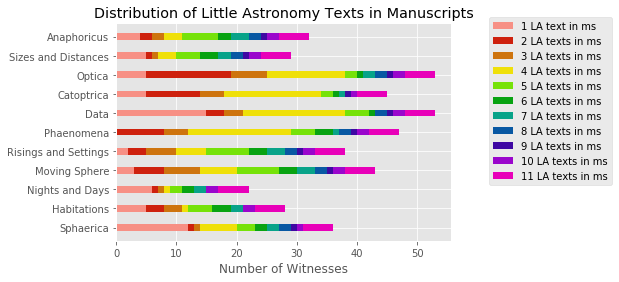

In [263]:
titles = []
wit1 = []
wit2 = []
wit3 = []
wit4 = []
wit5 = []
wit6 = []
wit7 = []
wit8 = []
wit9 = []
wit10 = []
wit11 = []

for text in texts:
    titles.append(to_fullName[text])
    
    wit1.append(counts[text][1][0])
    wit2.append(counts[text][2][0])
    wit3.append(counts[text][3][0])
    wit4.append(counts[text][4][0])
    wit5.append(counts[text][5][0])
    wit6.append(counts[text][6][0])
    wit7.append(counts[text][7][0])
    wit8.append(counts[text][8][0])
    wit9.append(counts[text][9][0])
    wit10.append(counts[text][10][0])
    wit11.append(counts[text][11][0])

y_pos = np.arange(len(titles))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(y_pos, wit1, width, color='#f79085')
p2 = plt.barh(y_pos, wit2, width, color='#ce210e', left=wit1)
p3 = plt.barh(y_pos, wit3, width, color='#ce740e', left=[i+j for i,j in zip(wit1,wit2)])
p4 = plt.barh(y_pos, wit4, width, color='#efe009', left=[i+j+k for i,j,k in zip(wit1,wit2,wit3)])
p5 = plt.barh(y_pos, wit5, width, color='#76e209', left=[i+j+k+l for i,j,k,l in zip(wit1,wit2,wit3,wit4)])
p6 = plt.barh(y_pos, wit6, width, color='#08a312', left=[i+j+k+l+m for i,j,k,l,m in zip(wit1,wit2,wit3,wit4,wit5)])
p7 = plt.barh(y_pos, wit7, width, color='#08a389', left=[i+j+k+l+m+n for i,j,k,l,m,n in zip(wit1,wit2,wit3,wit4,wit5,wit6)])
p8 = plt.barh(y_pos, wit8, width, color='#0858a3', left=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(wit1,wit2,wit3,wit4,wit5,wit6,wit7)])
p9 = plt.barh(y_pos, wit9, width, color='#3e08a3', left=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(wit1,wit2,wit3,wit4,wit5,wit6,wit7,wit8)])
p10 = plt.barh(y_pos, wit10, width, color='#9a06cc', left=[i+j+k+l+m+n+o+p+q for i,j,k,l,m,n,o,p,q in zip(wit1,wit2,wit3,wit4,wit5,wit6,wit7,wit8,wit9)])
p11 = plt.barh(y_pos, wit11, width, color='#e800b9', left=[i+j+k+l+m+n+o+p+q+r for i,j,k,l,m,n,o,p,q,r in zip(wit1,wit2,wit3,wit4,wit5,wit6,wit7,wit8,wit9,wit10)])

plt.yticks(y_pos, titles)
plt.xlabel('Number of Witnesses')
plt.title('Distribution of Little Astronomy Texts in Manuscripts')

ax = plt.subplot(111)
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), ('1 LA text in ms','2 LA texts in ms','3 LA texts in ms','4 LA texts in ms','5 LA texts in ms','6 LA texts in ms','7 LA texts in ms','8 LA texts in ms','9 LA texts in ms','10 LA texts in ms','11 LA texts in ms'), bbox_to_anchor=(1.1, 1.05))

plt.show()

Reassuringly there is some data here which clearly overlaps with that seen in the earlier visualizations, so our findings are consistent. (E.g. the Euclidean texts appear quite often in codices with only four LA texts.) Other findings also become apparent: the *Data* stands out as the most common standalone text, while the *Phaenomena* curiously never appears without one of the other LA texts.

---------

## Beyond the so-called Little Astronomy

Our focus has been on the eleven texts of the Little Astronomy, but as mentioned there are other factors which could conceivably bring texts together within a manuscript. Shared subject matter, shared authorship, or the link between a text and its commentary are all possible factors.

Another detail worth noting is that our present dataset is inclined to some bias because all of these manuscripts were selected *because* they included one or more LA texts. It seems worthwhile to start to reach beyond this to see if the patterns appearing for this colleciton of texts are indeed notable or not.

I have extracted from Pinakes data for 35 texts. These texts are 1) the *Almagest* and the *Elements*, as the supposed endpoints of the Little Astronomy 2) other works by authors whose texts appear in the Little Astronomy 3) the works of Archimedes, the other Greek author (besides LA authors) whose works appear in the Arabic Middle Books 4) commentaries on all of the preceding. These appear in 438 manuscripts, which partially overlap with the 147 manuscripts containing at least one Little Astronomy text.

The Little Astronomy database usually uses internal `shelfmark_id`s to identify each manuscript -- with around 300 new IDs to create, this task is not yet completed. Since all this information comes from Pinakes, however, we use the `pinakes_id` instead to distinguish between manuscripts.

In [264]:
sql4 = """
SELECT *
 FROM pinakesContents_new2
 ORDER BY pinakes_id DESC
"""

with connection.cursor() as cursor:

    cursor.execute(sql4)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df = pd.DataFrame(result, columns = names)
df

,pinakes_id,number_eu,number_LA,Auteur,Oeuvre
0,72898,1,1,Euclides,Optica
1,72763,0,0,Lexica,Varia
2,72763,0,0,Theon Alexandrinus,Commentaria In Ptolemaeum
3,72763,0,0,Proclus philosophus,In Platonis Timaeum commentaria
4,72763,0,0,Simplicius,In Aristotelis physicorum libros commentarius
5,72763,0,0,Alexander Aphrodisiensis,In Aristotelis sophisticos elenchos
6,72763,0,0,Alexander Aphrodisiensis,In Aristotelis topicorum libros octo
7,72763,0,0,Eustathius Thessalonicensis ep.,Commentaria in Homeri Iliadem et Odysseam
8,72763,0,0,Theophrastus philosophus,Opera
9,72752,0,0,Apollonius Pergaeus,Conica


In [265]:
counts = dict()
textsEuclid = (('Euclides','Phaenomena'),('Euclides','Optica'),('Euclides','Catoptrica (spur.)'),('Euclides','Data'),('Euclides','Elementa'),('Euclides','Epigramma'),('Euclides','Introductio harmonica'),('Euclides','Opera'),('Euclides','Sectio canonis'),('Theon Alexandrinus','Recensio Euclidis Opticorum'),('Theon Alexandrinus','Recensio Euclidis Elementorum'),('Theon Alexandrinus','Commentaria In Opera Euclidis'),('Marinus philosophus','Commentarium in Euclidis data'),('Hypsicles','Elementorum liber XIV qui fertur'),('Hypsicles','Elementorum Liber Xu'))

# TESTING
#df[['pinakes_id','number_eu','Auteur','Oeuvre']][
#    (df['Auteur'] == 'Euclides') & (df['Oeuvre'] == 'Optica')
#    & (df['number_eu'] == 1)].count()[0]


for text in textsEuclid:
    authorText = str(text[0]) + ' ' + str(text[1])
    counts[authorText] = dict()
    for i in range(1, len(textsEuclid)):     
        counts[authorText][i] = list()
        count = df[['pinakes_id','Auteur','Oeuvre']][(df['Auteur'] == text[0]) & (df['Oeuvre'] == text[1]) & (df['number_eu'] == i)].count()[0]
        counts[authorText][i].append((int(count)))
        


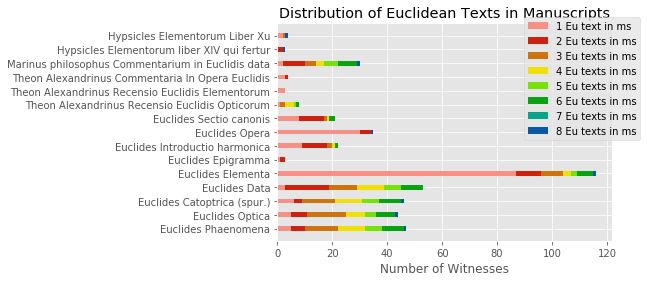

In [266]:
titles = []
wit1 = []
wit2 = []
wit3 = []
wit4 = []
wit5 = []
wit6 = []
wit7 = []
wit8 = []

for text in textsEuclid:
    authorText = str(text[0]) + ' ' + str(text[1])
    titles.append(authorText)
    
    wit1.append(counts[authorText][1][0])
    wit2.append(counts[authorText][2][0])
    wit3.append(counts[authorText][3][0])
    wit4.append(counts[authorText][4][0])
    wit5.append(counts[authorText][5][0])
    wit6.append(counts[authorText][6][0])
    wit7.append(counts[authorText][7][0])
    wit8.append(counts[authorText][8][0])

y_pos = np.arange(len(titles))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(y_pos, wit1, width, color='#f79085')
p2 = plt.barh(y_pos, wit2, width, color='#ce210e', left=wit1)
p3 = plt.barh(y_pos, wit3, width, color='#ce740e', left=[i+j for i,j in zip(wit1,wit2)])
p4 = plt.barh(y_pos, wit4, width, color='#efe009', left=[i+j+k for i,j,k in zip(wit1,wit2,wit3)])
p5 = plt.barh(y_pos, wit5, width, color='#76e209', left=[i+j+k+l for i,j,k,l in zip(wit1,wit2,wit3,wit4)])
p6 = plt.barh(y_pos, wit6, width, color='#08a312', left=[i+j+k+l+m for i,j,k,l,m in zip(wit1,wit2,wit3,wit4,wit5)])
p7 = plt.barh(y_pos, wit7, width, color='#08a389', left=[i+j+k+l+m+n for i,j,k,l,m,n in zip(wit1,wit2,wit3,wit4,wit5,wit6)])
p8 = plt.barh(y_pos, wit8, width, color='#0858a3', left=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(wit1,wit2,wit3,wit4,wit5,wit6,wit7)])

plt.yticks(y_pos, titles)
plt.xlabel('Number of Witnesses')
plt.title('Distribution of Euclidean Texts in Manuscripts')

ax = plt.subplot(111)
ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0]), ('1 Eu text in ms','2 Eu texts in ms','3 Eu texts in ms','4 Eu texts in ms','5 Eu texts in ms','6 Eu texts in ms','7 Eu texts in ms','8 Eu texts in ms'), bbox_to_anchor=(1.1, 1.05))
           
plt.show()

In [267]:
counts = dict()
textsEuclid = (('Euclides','Phaenomena'),('Euclides','Optica'),('Euclides','Catoptrica (spur.)'),('Euclides','Data'),('Euclides','Elementa'),('Euclides','Epigramma'),('Euclides','Introductio harmonica'),('Euclides','Opera'),('Euclides','Sectio canonis'),('Theon Alexandrinus','Recensio Euclidis Opticorum'),('Theon Alexandrinus','Recensio Euclidis Elementorum'),('Theon Alexandrinus','Commentaria In Opera Euclidis'),('Marinus philosophus','Commentarium in Euclidis data'),('Hypsicles','Elementorum liber XIV qui fertur'),('Hypsicles','Elementorum Liber Xu'))

for text in textsEuclid:
    authorText = str(text[0]) + ' ' + str(text[1])
    counts[authorText] = dict()
    for i in range(0, 12):     
        counts[authorText][i] = list()
        count = df[['pinakes_id','Auteur','Oeuvre']][(df['Auteur'] == text[0]) & (df['Oeuvre'] == text[1]) & (df['number_LA'] == i)].count()[0]
        counts[authorText][i].append((int(count)))


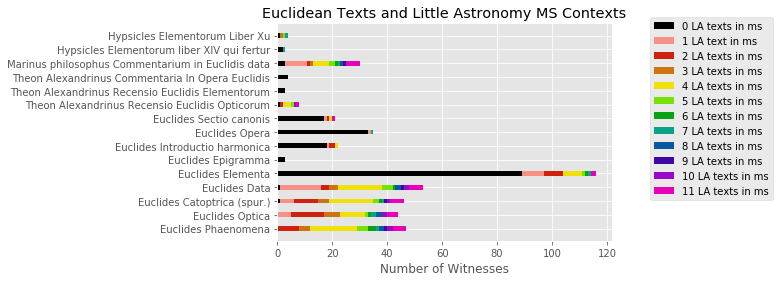

In [268]:
titles = []
wit0 = []
wit1 = []
wit2 = []
wit3 = []
wit4 = []
wit5 = []
wit6 = []
wit7 = []
wit8 = []
wit9 = []
wit10 = []
wit11 = []

for text in textsEuclid:
    authorText = str(text[0]) + ' ' + str(text[1])
    titles.append(authorText)
    
    wit0.append(counts[authorText][0][0])
    wit1.append(counts[authorText][1][0])
    wit2.append(counts[authorText][2][0])
    wit3.append(counts[authorText][3][0])
    wit4.append(counts[authorText][4][0])
    wit5.append(counts[authorText][5][0])
    wit6.append(counts[authorText][6][0])
    wit7.append(counts[authorText][7][0])
    wit8.append(counts[authorText][8][0])
    wit9.append(counts[authorText][9][0])
    wit10.append(counts[authorText][10][0])
    wit11.append(counts[authorText][11][0])

y_pos = np.arange(len(titles))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p0 = plt.barh(y_pos, wit0, width, color='#000000')
p1 = plt.barh(y_pos, wit1, width, color='#f79085', left=wit0)
p2 = plt.barh(y_pos, wit2, width, color='#ce210e', left=[i+j for i,j in zip(wit0,wit1)])
p3 = plt.barh(y_pos, wit3, width, color='#ce740e', left=[i+j+k for i,j,k in zip(wit0,wit1,wit2)])
p4 = plt.barh(y_pos, wit4, width, color='#efe009', left=[i+j+k+l for i,j,k,l in zip(wit0,wit1,wit2,wit3)])
p5 = plt.barh(y_pos, wit5, width, color='#76e209', left=[i+j+k+l+m for i,j,k,l,m in zip(wit0,wit1,wit2,wit3,wit4)])
p6 = plt.barh(y_pos, wit6, width, color='#08a312', left=[i+j+k+l+m+n for i,j,k,l,m,n in zip(wit0,wit1,wit2,wit3,wit4,wit5)])
p7 = plt.barh(y_pos, wit7, width, color='#08a389', left=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(wit0,wit1,wit2,wit3,wit4,wit5,wit6)])
p8 = plt.barh(y_pos, wit8, width, color='#0858a3', left=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(wit0,wit1,wit2,wit3,wit4,wit5,wit6,wit7)])
p9 = plt.barh(y_pos, wit9, width, color='#3e08a3', left=[i+j+k+l+m+n+o+p+q for i,j,k,l,m,n,o,p,q in zip(wit0,wit1,wit2,wit3,wit4,wit5,wit6,wit7,wit8)])
p10 = plt.barh(y_pos, wit10, width, color='#9a06cc', left=[i+j+k+l+m+n+o+p+q+r for i,j,k,l,m,n,o,p,q,r in zip(wit0,wit1,wit2,wit3,wit4,wit5,wit6,wit7,wit8,wit9)])
p11 = plt.barh(y_pos, wit11, width, color='#e800b9', left=[i+j+k+l+m+n+o+p+q+r+s for i,j,k,l,m,n,o,p,q,r,s in zip(wit0,wit1,wit2,wit3,wit4,wit5,wit6,wit7,wit8,wit9,wit10)])

plt.yticks(y_pos, titles)
plt.xlabel('Number of Witnesses')
plt.title('Euclidean Texts and Little Astronomy MS Contexts')

ax = plt.subplot(111)
ax.legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0]), ('0 LA texts in ms','1 LA text in ms','2 LA texts in ms','3 LA texts in ms','4 LA texts in ms','5 LA texts in ms','6 LA texts in ms','7 LA texts in ms','8 LA texts in ms','9 LA texts in ms','10 LA texts in ms','11 LA texts in ms'), bbox_to_anchor=(1.1, 1.05))

plt.show()

Unsurprisingly the *Elements* of Euclid is the most frequently appearing text.

There is clearly an error somewhere in our dataset, since one or two witnesses of Euclid's *Data* and *Catoptrica* claim to have no LA text in the manuscript in question, which of course makes no sense -- those two texts are LA texts. I strongly suspect this comes from some data which was added at a later point this semester, after the initial run I had made last semester where I was careful to include accurate counts.

The below query identifies the problematic entries, which will be corrected.

In [269]:
df[['pinakes_id','number_LA','Auteur','Oeuvre']][((df['Auteur'] == 'Euclides') & (df['Oeuvre'] == 'Data') & (df['number_LA'] == 0)) | ((df['Auteur'] == 'Euclides') & (df['Oeuvre'] == 'Catoptrica (spur.)') & (df['number_LA'] == 0))]


,pinakes_id,number_LA,Auteur,Oeuvre
1661,52099,0,Euclides,Data
3864,12571,0,Euclides,Catoptrica (spur.)


In [270]:
counts = dict()
textsLA = (('Euclides','Phaenomena'),('Euclides','Optica'),('Euclides','Catoptrica (spur.)'),('Euclides','Data'),('Autolycus astronomus','De ortibus et occasibus'),('Autolycus astronomus','De sphaera quae mouetur'),('Theodosius Tripolita','De habitationibus'),('Theodosius Tripolita','De diebus et noctibus'),('Theodosius Tripolita','Sphaerica'),('Hypsicles','Anaphoricus'),('Aristarchus Samius astronomus','De magnitudinibus et distantiis solis et lunae'))

for text in textsLA:
    authorText = str(text[0]) + ' ' + str(text[1])
    counts[authorText] = dict()
    for i in range(0, len(textsEuclid)):     
        counts[authorText][i] = list()
        count = df[['pinakes_id','Auteur','Oeuvre']][(df['Auteur'] == text[0]) & (df['Oeuvre'] == text[1]) & (df['number_eu'] == i)].count()[0]
        counts[authorText][i].append((int(count)))
        


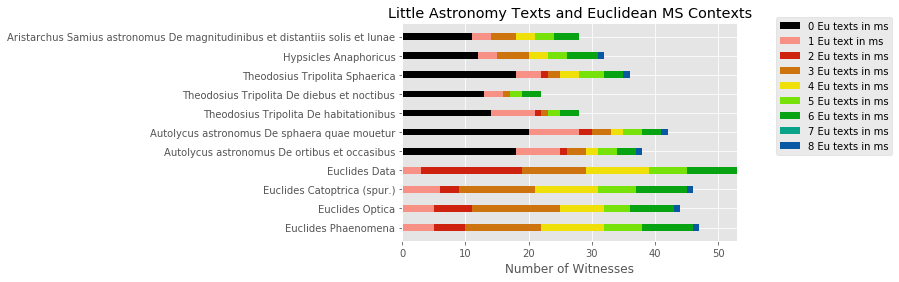

In [275]:
titles = []
wit0 = []
wit1 = []
wit2 = []
wit3 = []
wit4 = []
wit5 = []
wit6 = []
wit7 = []
wit8 = []

for text in textsLA:
    authorText = str(text[0]) + ' ' + str(text[1])
    titles.append(authorText)
    
    wit0.append(counts[authorText][0][0])
    wit1.append(counts[authorText][1][0])
    wit2.append(counts[authorText][2][0])
    wit3.append(counts[authorText][3][0])
    wit4.append(counts[authorText][4][0])
    wit5.append(counts[authorText][5][0])
    wit6.append(counts[authorText][6][0])
    wit7.append(counts[authorText][7][0])
    wit8.append(counts[authorText][8][0])

y_pos = np.arange(len(titles))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
lists_of_lists = (wit0,wit1)
p0 = plt.barh(y_pos, wit0, width, color='#000000')
p1 = plt.barh(y_pos, wit1, width, color='#f79085', left=wit0)
p2 = plt.barh(y_pos, wit2, width, color='#ce210e', left=[sum(x) for x in zip(*lists_of_lists)])
p3 = plt.barh(y_pos, wit3, width, color='#ce740e', left=[i+j+k for i,j,k in zip(wit0,wit1,wit2)])
p4 = plt.barh(y_pos, wit4, width, color='#efe009', left=[i+j+k+l for i,j,k,l in zip(wit0,wit1,wit2,wit3)])
p5 = plt.barh(y_pos, wit5, width, color='#76e209', left=[i+j+k+l+m for i,j,k,l,m in zip(wit0,wit1,wit2,wit3,wit4)])
p6 = plt.barh(y_pos, wit6, width, color='#08a312', left=[i+j+k+l+m+n for i,j,k,l,m,n in zip(wit0,wit1,wit2,wit3,wit4,wit5)])
p7 = plt.barh(y_pos, wit7, width, color='#08a389', left=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(wit0,wit1,wit2,wit3,wit4,wit5,wit6)])
p8 = plt.barh(y_pos, wit8, width, color='#0858a3', left=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(wit0,wit1,wit2,wit3,wit4,wit5,wit6,wit7)])

plt.yticks(y_pos, titles)
plt.xlabel('Number of Witnesses')
plt.title('Little Astronomy Texts and Euclidean MS Contexts')

ax = plt.subplot(111)
ax.legend((p0[0],p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0]), ('0 Eu texts in ms','1 Eu text in ms','2 Eu texts in ms','3 Eu texts in ms','4 Eu texts in ms','5 Eu texts in ms','6 Eu texts in ms','7 Eu texts in ms','8 Eu texts in ms'), bbox_to_anchor=(1.1, 1.05))
           
plt.show()

This graph actually reveals that there is an issue somewhere in the new data produced. Compare this graph with the graph 'Distribution of Little Astronomy Texts in Manuscripts'. While our legends clarify that we are looking at different things (contexts regarding number of LA texts in the ms and those regarding number of Euclidean texts in our ms) and so we would expect different distributions of color, the number of witnesses for each text should be consistent between the graphs.

The first graph was produced from data which appeared in the `ms-to-texts` table -- this information, while drawn from Pinakes, had been corrected last semester through comparison with the critical editions. The second graph draws from `pinakesContents_new2` and specifically locates texts via a combination of the `Auteur` and `Oeuvre` columns, taken directly from Pinakes and uncorrected.

One known issue is that in the first graph, Euclid's *Optics* actually comprised both Euclides's *Optica* and Theon Alexandrinus's *Recensio Euclidis Opticorum*. The current code does not yet have a way of adding these two values together.

## A Function for Creating these Graphs

It is valuable to know how frequently texts appear together in the same manuscript or in what contexts texts appear -- and these correlations and contexts can be variable, from LA texts in Euclidean contexts to works compared with the total number of texts in a ms, or from correlations between pairs of LA texts to those between texts and commentaries. It is therefore desirable to create a function that can take one or two different lists of texts and a numerical input for the legend and produce graph representations like the above.

This is in progress, but dictionaries and the example of list comprehension in the last line of the below code block should make this doable.

In [272]:
print(wit0,wit1)

print([i+j for i,j in zip(wit0,wit1)])
    
lists_of_lists = (wit0,wit1)
print([sum(x) for x in zip(*lists_of_lists)])

[5, 5, 6, 3, 7, 8, 7, 3, 4, 3, 3] [5, 5, 6, 3, 7, 8, 7, 3, 4, 3, 3]
[10, 10, 12, 6, 14, 16, 14, 6, 8, 6, 6]
[10, 10, 12, 6, 14, 16, 14, 6, 8, 6, 6]
